# Titanic Training

In [1]:
# imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Reading of the dataset
dataset = pd.read_csv('data/train.csv')

In [3]:
# Checking dimensions
dataset.shape

(891, 12)

In [4]:
# checking columns names
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking columns types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Simple Statistics
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 38.4 %  survived
* mean age of passenger : 29
* mean fare : 32

In [7]:
dataset.notnull().mean()

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64

# Extracting hidden informations

In [8]:
# getting side of boat (letter of cabin)
dataset['CabinLetter'] = dataset.Cabin.str[:1]
dataset['CabinLetter'] = dataset['CabinLetter'].fillna('N')
dataset['Embarked'] = dataset['Embarked'].fillna('N')

In [9]:
dataset['AgeCategory'] = pd.qcut(dataset.Age,15)

# Analysis of Correlations

In [10]:
# Correlation analysis
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


* Survived vs
 * PClass : negative. The higher the class the less probable to survive. TO INVESTIGATE
 * Age : very little correlation age - surviving. TO INVESTIGATE
 * Having parents or siblings on board is not correlated with surviving
 * Fare is correlated with surving CHECK CORRELATION FARE PCLASS
* Pclass vs
 * Age Negative : Younger in lowest class. Age -> surviving, Class -> surviving,  age -> class -> surving TO INVESTIGATE
 * Fare Negative : Confirmation a 3rd class is cheaper
* Age vs
 * SibSP and Parch : Negative Younger are more likely to have family in the boat. Family  not correlated with surviving ? TO INVESTIGATE
* SibSP vs
 * Age having a sibling or a parent on board is negatively correlated with age
 * having a sibling is correlated with having a parent on board
 * Fare : family ticket ?

 
 

## Cross Tabulations

In [11]:
def cross_tab(data):
    col = ['Pclass', 'Sex', 'SibSp', 'Parch','CabinLetter','AgeCategory','Embarked']
    l = []
    for var in col:
        ct = pd.crosstab(dataset.Survived, dataset[var],margins=True)
        ct = ct/ct.ix["All"]
        l.append(ct)
        ct = pd.DataFrame.transpose(ct)
        ct.columns = ['died','survived','all']
        sns.barplot(x = 'died', y = ct.index, data = ct)
        plt.axvline(x=ct.died['All'])
        plt.show()      
    return l

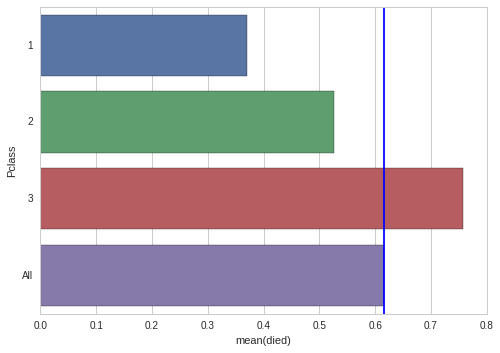

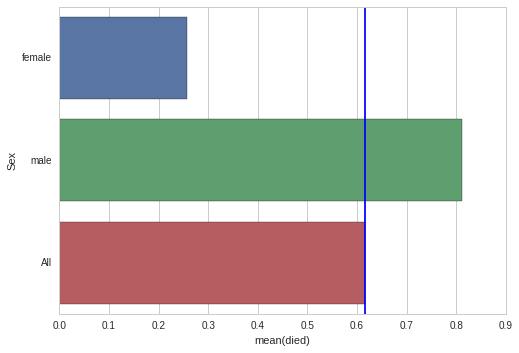

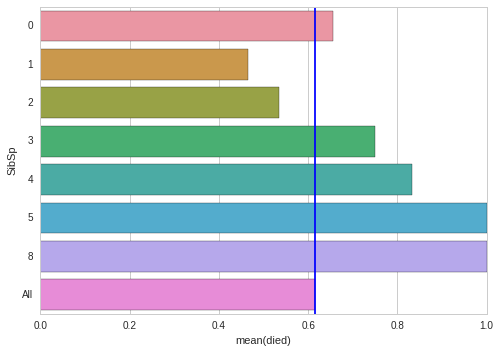

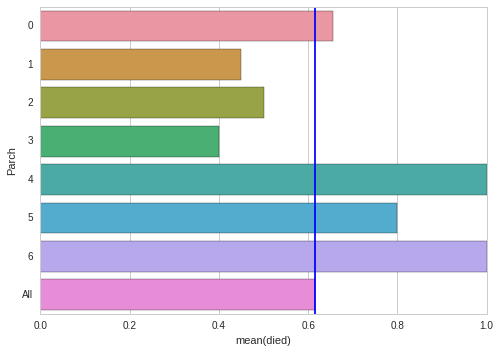

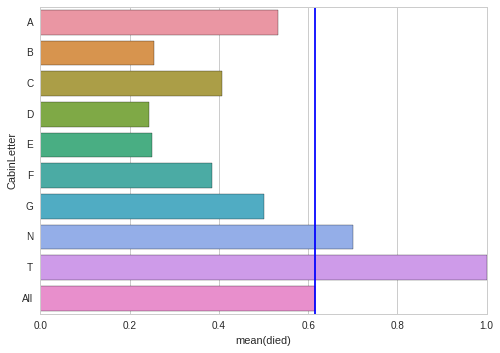

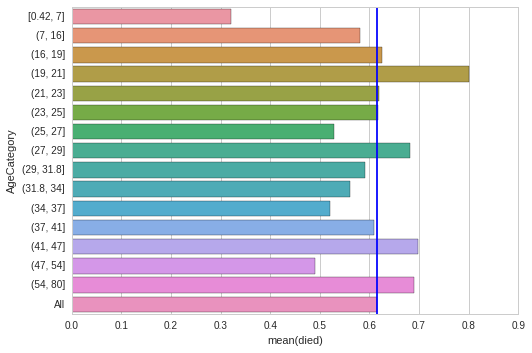

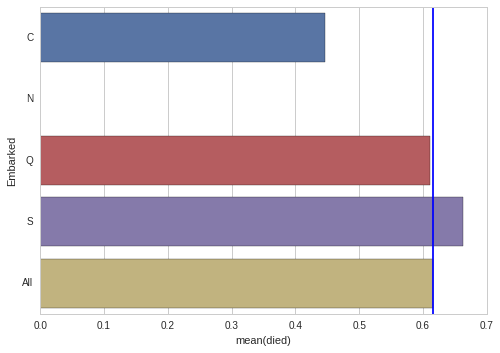

In [12]:
cross_tabs = cross_tab(dataset)

* Third class had higher probability to die
* male had higher probabiity to die
* Having 3 or more siblings had higher probability to die, 1 and 2 is lowest
* Having 1 to 3 parents on the boat ha lowest probability, 4 to six has highest probability
* Having a cabin is linked to lowest probability to die. T has the highest probability
* Age 19-21 and 27-29 and 47-47 years old has the highest probability

## Cross tabulations by sex and probaibility to die

In [13]:
def cross_tab_sex(data):
    col = ['Pclass', 'SibSp', 'Parch','CabinLetter','AgeCategory','Embarked']
    l = []
    for var in col:
        ct = pd.crosstab(dataset.Survived, [dataset[var],dataset['Sex']], margins = True)
        ct = ct/ct.ix["All"]
        ct = pd.DataFrame.transpose(ct)
        ct.reset_index(inplace=True) 
        sns.heatmap(ct[[var,'Sex',0]].pivot(var,'Sex',0)[['female','male']])
        plt.show()

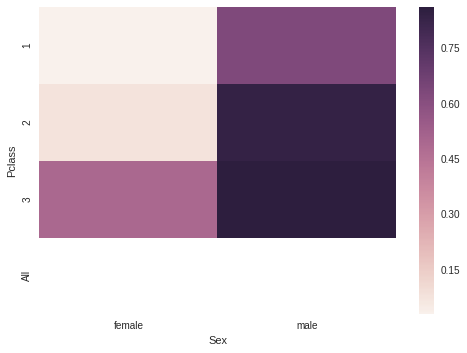

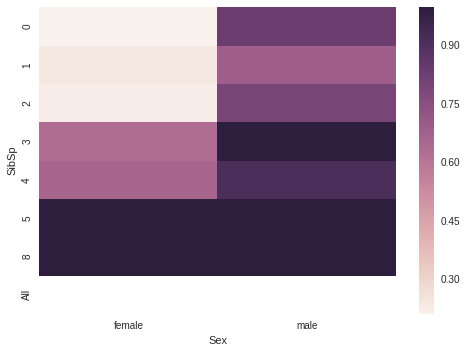

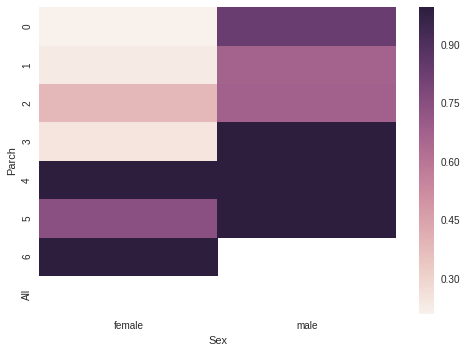

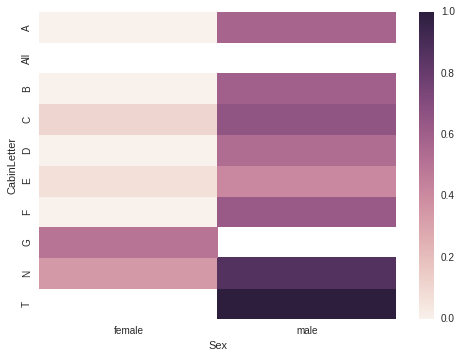

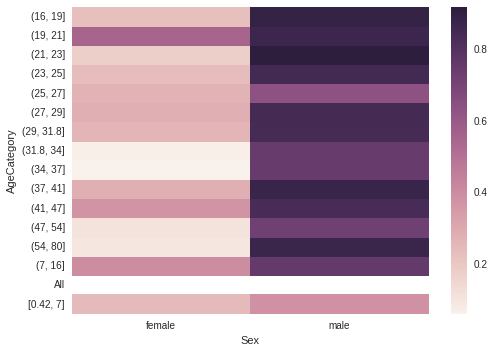

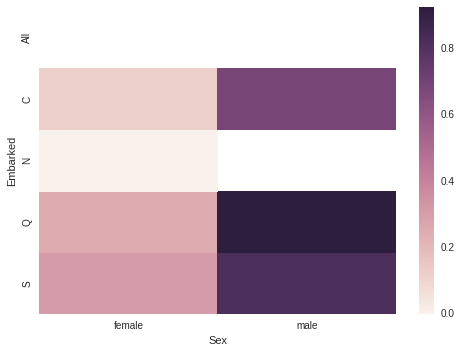

In [14]:
cross_tab_sex(dataset)

# Age Predictions

In [15]:
# fn to convert number columns to string
def convert_to_string(df,col):
    for c in col:
        dataset[c] = dataset[c].apply(str)


In [16]:
# Setting categories dummies
convert_to_string(dataset,['Pclass','Parch','SibSp'])
dataset_dummies = pd.get_dummies(dataset[['Pclass','Sex','Parch','SibSp','Embarked','CabinLetter']])
dataset_dummies = dataset_dummies.join(dataset[['Fare','Age']])

## Age prediction

* 1 Filtering out lines without age
* 2 Dummies creation
* 3 Dimensionnality Reduction with Factor Analysis method to N dimensions
* 4 Classifier tuning with grid search
* 5 Classifier prediction
* 6 Estimation of MSE
* 7 Selection of best classifier with best hyperparameter


In [17]:
# Filtering out lines wihtout age
dataset_dummies_age = dataset_dummies[dataset_dummies.Age.notnull()]

In [18]:
# loading libraries
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression

In [19]:
# dividing dataset between train and test
X = dataset_dummies_age[['Pclass_1','Pclass_2','Pclass_3',
           'Sex_female','Sex_male',
           'Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6',
           'SibSp_0','SibSp_1', 'SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8',
           'Embarked_C','Embarked_Q','Embarked_S',
           'CabinLetter_A', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F',
           'CabinLetter_G', 'CabinLetter_N', 'CabinLetter_T',
           'Fare']]
Y = dataset_dummies_age['Age']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33)


### Search best estimator for Age prediction

In [20]:
def test_estimator(clf,param_grid,Xt,Yt):
    
    dimensions = Xt.shape[1] - 1
    scores = []
    
    # Divide into subset
    folds = KFold(Xt.shape[0], n_folds=5)
    
    # Grid search parameters
    gs = GridSearchCV(estimator = clf,
                  param_grid = param_grid,
                  cv = 5)
    
    #For each dimensions
    for d in range(2,dimensions):
        components = FactorAnalysis(n_components = d)
        print('En cours : ', d)
        
        # For each subset 
        for train_index,test_index in folds:
            
            # separate train and test
            X_train_ = Xt.iloc[train_index]
            Y_train_ = Yt.iloc[train_index]
            X_test_ = Xt.iloc[test_index]
            Y_test_ = Yt.iloc[test_index]
            
            # Reduce dimensionality
            X_train_reduced = components.fit_transform(X_train_)
            X_test_reduced = components.transform(X_test_)
            
            # Predict 
            predicted = gs.fit(X_train_reduced,Y_train_).predict(X_test_reduced)
            
            # Estimate MSE
            acc = mean_squared_error(predicted,Y_test_)
            
            # append MSE to table
            scores.append({'dimensions':d,'params' : gs.best_params_, 'score' : acc})
            
    return scores

In [21]:
# Automatic search of estimators
def test_estimators(clf_params,Xt,Yt):
    result = []
    for clf,params in clf_params:
        result.append(test_estimator(clf,params,Xt,Yt))
    return result

In [22]:
# Prepare parameters
clf_params = [
    (KNeighborsRegressor(),{'n_neighbors': list(range(1,30)),'p': [1,2],'weights': ['uniform','distance']}),
    (LinearRegression(),{}),
    (Ridge(),{'alpha' : [10,1,10.01,0.001,0.0001,0.00001]}),
    (Lasso(),{'alpha' : [10,1,10.01,0.001,0.0001,0.00001],'max_iter':[100000]})]

# Let's go !
results = test_estimators(clf_params,X_train,y_train)

En cours :  2
En cours :  3
En cours :  4
En cours :  5
En cours :  6
En cours :  7
En cours :  8
En cours :  9
En cours :  10
En cours :  11
En cours :  12
En cours :  13
En cours :  14
En cours :  15
En cours :  16
En cours :  17
En cours :  18
En cours :  19
En cours :  20
En cours :  21
En cours :  22
En cours :  23
En cours :  24
En cours :  25
En cours :  26
En cours :  27
En cours :  28
En cours :  29
En cours :  30
En cours :  2
En cours :  3
En cours :  4
En cours :  5
En cours :  6
En cours :  7
En cours :  8
En cours :  9
En cours :  10
En cours :  11
En cours :  12
En cours :  13
En cours :  14
En cours :  15
En cours :  16
En cours :  17
En cours :  18
En cours :  19
En cours :  20
En cours :  21
En cours :  22
En cours :  23
En cours :  24
En cours :  25
En cours :  26
En cours :  27
En cours :  28
En cours :  29
En cours :  30
En cours :  2
En cours :  3
En cours :  4
En cours :  5
En cours :  6
En cours :  7
En cours :  8
En cours :  9
En cours :  10
En cours :  11
En c

/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


En cours :  26
En cours :  27


/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


En cours :  28


/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


En cours :  29


/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/florimond/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


En cours :  30


In [23]:
#results = pd.DataFrame.transpose(pd.DataFrame(results))
res_knn = pd.DataFrame(list(results[0]))
res_lr = pd.DataFrame(list(results[1]))
res_ridge = pd.DataFrame(list(results[2]))
res_lasso = pd.DataFrame(list(results[3]))

In [24]:
res_lr.groupby('dimensions').agg([np.mean,np.std])

score           
                  mean        std
dimensions                       
2           187.291155  20.421626
3           179.596478  16.012704
4           179.855195  17.041402
5           180.738243  13.358627
6           171.072913  13.674638
7           164.337140  14.079286
8           158.522346  13.572389
9           158.911562  13.300573
10          156.926975  11.592250
11          158.113241  15.427114
12          158.242322  16.255680
13          160.548764  22.093893
14          157.697941  19.860696
15          158.053186  19.591196
16          158.129176  19.216462
17          157.200082  19.804396
18          156.960743  19.541914
19          158.766078  20.594033
20          157.349504  20.113063
21          158.509022  22.948163
22          157.016399  20.677764
23          156.944894  26.400774
24          154.507657  23.977451
25          161.777818  25.675156
26          162.001821  25.767255
27          165.861689  30.802361
28          165.653711  30.953141
29          166.163074  30.906513
30          166.095347  30.940085

Linear regression with dimensionality reduction to 25

## Applying age prediction with linear regression

In [35]:
def create_predict_age(X_train,y_train,X_test,y_test):
    components = FactorAnalysis(n_components = 25)
    X_train_reduced = components.fit_transform(X_train)
    X_test_reduced = components.transform(X_test)
    clf = LinearRegression().fit(X = X_train_reduced,y = y_train)
    predicted = clf.predict(X_test_reduced)
    acc = mean_squared_error(predicted,y_test)
    print(acc)
    return clf

In [36]:
age_predictor = create_predict_age(X_train,y_train,X_test,y_test)

149.605233937


In [27]:
dataset_dummies_age = dataset_dummies[dataset_dummies.Age.isnull()]
cols = ['Pclass_1','Pclass_2','Pclass_3',
           'Sex_female','Sex_male',
           'Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6',
           'SibSp_0','SibSp_1', 'SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8',
           'Embarked_C','Embarked_Q','Embarked_S',
           'CabinLetter_A', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F',
           'CabinLetter_G', 'CabinLetter_N', 'CabinLetter_T',
           'Fare']

In [28]:
def predict_missing_age(dataset_dummies_age,clf):
    dataset_dummies_age = dataset_dummies[dataset_dummies.Age.isnull()]
    cols = ['Pclass_1','Pclass_2','Pclass_3',
           'Sex_female','Sex_male',
           'Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6',
           'SibSp_0','SibSp_1', 'SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8',
           'Embarked_C','Embarked_Q','Embarked_S',
           'CabinLetter_A', 'CabinLetter_B', 'CabinLetter_C', 'CabinLetter_D', 'CabinLetter_E', 'CabinLetter_F',
           'CabinLetter_G', 'CabinLetter_N', 'CabinLetter_T',
           'Fare']
    X = dataset_dummies_age[cols]
    components = FactorAnalysis(n_components = 25)
    X_reduced = components.fit_transform(X)
    return clf.predict(X_reduced)
    

In [29]:
datanull = dataset_dummies[dataset_dummies.Age.isnull()]
datanull['AgePredicted'] =predict_missing_age(dataset_dummies_age,age_predictor)

/home/florimond/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
dataset_dummies = dataset_dummies.join(datanull['AgePredicted'])

In [31]:
f = np.vectorize(lambda age,ageP: age if (not np.isnan(age)) else ageP)
dataset_dummies = dataset_dummies.assign(final_age = f(dataset_dummies.Age,dataset_dummies.AgePredicted))

In [32]:
dataset_dummies.final_age.isnull().mean()

0.0